## PIP, Import y read

In [1]:
!pip install ipython
!pip install seaborn
!pip install regex

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
data =pd.read_csv('../Data/attacks.csv', encoding='latin1')
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataframe original

In [4]:
# Modifico el nombre de las columnas a minusculas y le quito los espacios.

data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data.columns=[c.lower().replace(':', '') for c in data.columns]
data.columns=[c.lower().replace('.', '_') for c in data.columns]
data.columns=[c.lower().replace('(', '') for c in data.columns]
data.columns=[c.lower().replace(')', '') for c in data.columns]
data.columns=[c.lower().replace('/', '_') for c in data.columns]

In [5]:
data.shape

(25723, 24)

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [7]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [8]:
nan_cols=data.isna().sum()
nan_cols.head()

case_number    17021
date           19421
year           19423
type           19425
country        19471
dtype: int64

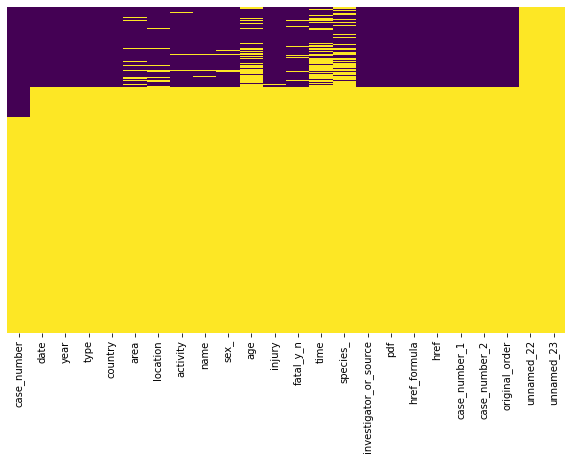

In [9]:
plt.figure(figsize=(10, 6))

sns.heatmap(data.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [10]:
# Funcion que chequea los valores nulos y devuelve un histograma con ellos en forma de mapa de calor

def check_nan(df):
    
    nan_cols=df.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

## Subset si filas nulas

In [11]:
# Me creo un dataset con las filas que son todo nulos.

data_null = data[data.isna().all(axis=1)]


In [12]:
# Me creo un subset con las filas que tiene al menos dato.

subset = data[data.notna().any(axis=1)]


In [13]:
subset.shape

(8703, 24)

In [14]:
# Sustituyo todos los valores de la columna unnamed_22 y unnamed_23

subset.unnamed_22 = 'unknown'
subset.unnamed_23 = 'unknown'


In [15]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null  

In [16]:
# Comprobar si hay duplicados, comprobando el numero de filas es la misma

len(subset.drop_duplicates())==len(subset)  

False

'N nan cols: 22'

case_number                0.011490
date                      27.588188
year                      27.611169
type                      27.634149
country                   28.162703
area                      32.816270
location                  33.792945
activity                  33.838906
name                      30.001149
sex_                      34.080202
age                       60.117201
injury                    27.909916
fatal_y_n                 33.781455
time                      66.126623
species_                  60.197633
investigator_or_source    27.783523
pdf                       27.588188
href_formula              27.599678
href                      27.588188
case_number_1             27.588188
case_number_2             27.588188
original_order            27.507756
dtype: float64

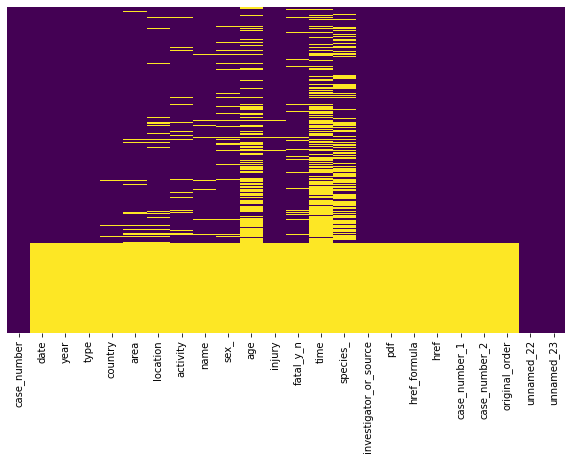

In [17]:
check_nan(subset)

In [18]:
subset.year.isna().sum()

2403

## Subset sin filas con practicamente todo nulos

In [19]:
# Creo un dataset en la que elimino columnas con las que quiero filtras.

filters_cols = subset.columns.drop(['case_number', 'original_order', 'unnamed_22', 'unnamed_23'])

# Me creo un data set con lo que elimino


data_null2 = subset[subset[filters_cols].isnull().all(axis=1)]

# Me creo un dataset mas limpio con el que voy a seguir trabajando


subset1 = subset[subset[filters_cols].notnull().any(axis=1)]


'N nan cols: 16'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex_                       8.965408
age                       44.922247
injury                     0.444303
fatal_y_n                  8.552840
time                      53.221200
species_                  45.033323
investigator_or_source     0.269756
href_formula               0.015868
dtype: float64

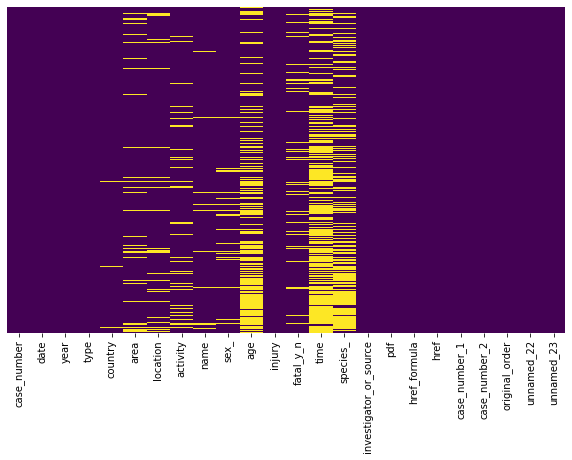

In [20]:
check_nan(subset1)

In [21]:
subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_y_n               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null   

In [22]:
len(subset1)

6302

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
# Compruebo si hay duplicado, en este caso no los hay

len(subset1.drop_duplicates())==len(subset1)

True

## Empiezo a analizar mi subset y limpiar


In [25]:
subset1.case_number.head() 

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: case_number, dtype: object

In [26]:
subset1.case_number.value_counts().head()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
Name: case_number, dtype: int64

In [27]:
subset1.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

### case_number

In [28]:
# Reviso case_number y está todo en orden

In [29]:
subset1.case_number.head() 

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: case_number, dtype: object

In [30]:
subset1.case_number.value_counts().head()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
Name: case_number, dtype: int64

In [31]:
# Miro a ver si hay valores nulos

subset1.case_number.isnull().sum()

1

In [32]:
# Remplazo los valores nulos en la columna con "unknown"

subset1.case_number.fillna("unknown", inplace=True)

### date

In [33]:
# Remplazo en date "Reported" por ""

subset1.date = subset1.date.str.replace("Reported", "")

### year

In [34]:
# Miro si hay nulos y remplazo por 0

subset1.year.isnull().sum()

2

In [35]:
subset1.year.fillna(0, inplace=True)

In [36]:
# Cambio el dtype de "object" a "int16"

subset1.year = subset1.year.astype(dtype='int16')

### type

In [37]:
# Remplazo ciertos valores

In [38]:
subset1.type = subset1.type.str.replace("Boating", "Boat")
subset1.type = subset1.type.str.replace("Boatomg", "Boat")

In [39]:
subset1.type.isnull().sum()

4

In [40]:
# Relleno valores nulos con "Questionable"

In [41]:
subset1.type.fillna("Questionable", inplace=True)

### country

In [42]:
# Relleno con "unknown" los valores nulos

In [43]:
subset1.country.isnull().sum()

50

In [44]:
subset1.country.fillna("unknown", inplace=True)

### area

In [45]:
subset1.area.isnull().sum()

455

In [46]:
subset1.area.fillna("unknown", inplace=True)

### location

In [47]:
subset1.location.isnull().sum()

540

In [48]:
subset1.location.fillna("unknown", inplace=True)

### activity

In [49]:
subset1.activity.isnull().sum()

544

In [50]:
subset1.activity.fillna("unknown", inplace=True)

In [51]:
subset1.activity.value_counts().head()

Surfing         971
Swimming        869
unknown         544
Fishing         431
Spearfishing    333
Name: activity, dtype: int64

## name

In [52]:
subset1.name.isnull().sum()


210

In [53]:
subset1.name.fillna("unknown", inplace=True)

### sex

In [54]:
subset1.sex_.fillna("unknown", inplace=True)

In [55]:
subset1.sex_ = subset1.sex_.str.replace("M", "Male")
subset1.sex_ = subset1.sex_.str.replace("F", "Female")
subset1.sex_ = subset1.sex_.str.replace("N", "unknown")
subset1.sex_ = subset1.sex_.str.replace("lli", "unknown")
subset1.sex_ = subset1.sex_.str.replace(".", "unknown")
subset1.sex_ = subset1.sex_.str.replace(" ", "")

In [56]:
subset1.sex_.value_counts()

Male       5096
Female      637
unknown     569
Name: sex_, dtype: int64

In [57]:
subset1.sex_.unique()

array(['Female', 'Male', 'unknown'], dtype=object)

### age

In [58]:
subset1.age.isna().sum()

2831

In [59]:
subset1.age.fillna("0", inplace=True)

In [60]:
# Uso regex para filtrar en data set los datos que contienen datos que no son numerico '\D'

subset1.age[subset1.age.str.contains(r'\D')] = "0"

In [61]:
# Cambiar el tipo de dtype de "object" a "integer"

subset1.age = subset1.age.astype(dtype='int8')

### injury

In [62]:
subset1.injury.isna().sum()

28

In [63]:
subset1.injury.fillna("unknown", inplace=True)

In [87]:
len(subset1.injury.unique())

3737

### fatal_y_n

In [64]:
subset1.fatal_y_n.isna().sum()

539

In [65]:
subset1.fatal_y_n.fillna("unknown", inplace=True)

In [66]:
subset1.fatal_y_n = subset1.fatal_y_n.str.replace(" ", "")
subset1.fatal_y_n = subset1.fatal_y_n.str.upper()
subset1.fatal_y_n = subset1.fatal_y_n.str.replace("M", "UNKNOWN")
subset1.fatal_y_n = subset1.fatal_y_n.str.replace("2017", "UNKNOWN")

In [89]:
subset1.fatal_y_n.value_counts()

N          4301
Y          1389
UNKNOWN     612
Name: fatal_y_n, dtype: int64

### time

In [68]:
subset1.time.isna().sum()

3354

In [69]:
subset1.time.fillna("unknown", inplace=True)

### species_

In [71]:
subset1.species_.isna().sum()

2838

In [72]:
subset1.species_.fillna("unknown", inplace=True)

### investigator_or_source

In [73]:
subset1.investigator_or_source.isna().sum()

17

In [74]:
subset1.investigator_or_source.fillna("unknown", inplace=True)

### pdf

In [75]:
subset1.pdf.isna().sum()

0

### href_formula

In [76]:
subset1.href_formula.isna().sum()

1

In [77]:
subset1.href_formula.fillna("unknow", inplace=True)

### href

In [78]:
subset1.href.head()

0    http://sharkattackfile.net/spreadsheets/pdf_di...
1    http://sharkattackfile.net/spreadsheets/pdf_di...
2    http://sharkattackfile.net/spreadsheets/pdf_di...
3    http://sharkattackfile.net/spreadsheets/pdf_di...
4    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href, dtype: object

### case_number_1

In [79]:
subset1.case_number_1.head()

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: case_number_1, dtype: object

### case_number_2

In [80]:
subset1.case_number_2.head()

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: case_number_2, dtype: object

###  original_order

In [81]:
subset1.original_order.head()

0    6303.0
1    6302.0
2    6301.0
3    6300.0
4    6299.0
Name: original_order, dtype: float64

## Reviso mi subset para comprobar como queda

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_y_n,time,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,Male,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Male,0,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Male,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,unknown
